## Option 1: Pyber


The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* See [Starter Workbook](Pyber/pyber_starter.ipynb) for a reference on expected format.

In [9]:
%matplotlib inline
# import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# files to Load 
city_path = "data/city_data.csv"
ride_path = "data/ride_data.csv"

# read csv files
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

# merge city and rides files
combined_df = pd.merge(ride_data,city_data,on="city")
# combined_df.head()

In [10]:
# create and store color scheme per read.me
# color names from https://matplotlib.org/gallery/color/named_colors.html
colors_dict = {"Rural":"gold","Suburban":"lightskyblue","Urban":"lightcoral"}

## Bubble Plot of Ride Sharing Data

In [11]:
# create df grouped by city
by_city = combined_df.groupby("city")

# get per city data
avg_fare = by_city["fare"].mean()
rides = by_city["ride_id"].count()
drivers = by_city.mean()['driver_count'].astype(int)
city_type = city_data["type"].values


# create per city df for scatter plots
city_dict = {
    "# Rides": rides,
    "Average Fare": avg_fare,
    "# Drivers": drivers,
    "City Type": city_type
}

by_city_df = pd.DataFrame.from_dict(city_dict).sort_values(["# Drivers"],ascending=False)


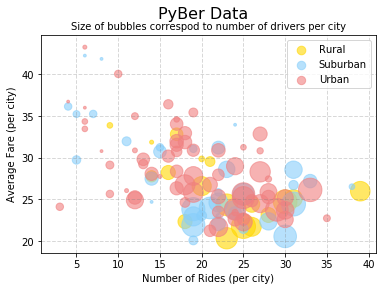

In [12]:
# Get x and y coordinates for city type
rural_df = by_city_df[by_city_df["City Type"] == "Rural"]
urban_df = by_city_df[by_city_df["City Type"] == "Urban"]
suburban_df = by_city_df[by_city_df["City Type"] == "Suburban"]


# Build the scatter plots for each city types
plt.scatter(
    rural_df["# Rides"],
    rural_df["Average Fare"],
    s=rural_df["# Drivers"]*8,
    color= colors_dict["Rural"],
    label="Rural",
    alpha=0.6
)
plt.scatter(
    suburban_df["# Rides"],
    suburban_df["Average Fare"],
    s=suburban_df["# Drivers"]*8,
    color= colors_dict["Suburban"],
    label="Suburban",
    alpha=0.6
)
plt.scatter(
    urban_df["# Rides"],
    urban_df["Average Fare"],
    s=urban_df["# Drivers"]*8,
    color= colors_dict["Urban"],
    label="Urban",
    alpha=0.6
)


plt.suptitle("PyBer Data",fontsize=16)
plt.title("Size of bubbles correspod to number of drivers per city",fontsize=10)
plt.xlabel("Number of Rides (per city)")
plt.ylabel("Average Fare (per city)")
plt.legend(title = "City Type")
plt.legend(markerscale=.5,fontsize=10)
plt.grid(color='grey', linestyle='--', linewidth=1,alpha=0.3)


# save plot image
plt.savefig("pyber_ride_sharing_data.jpg")

# display image
plt.show()

## Total Fares by City Type

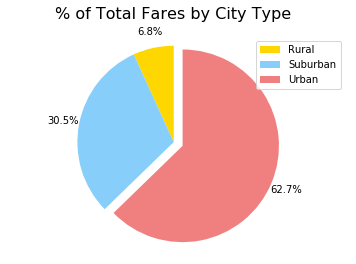

In [13]:
# create a groupby obj organized by type to get totals by type
by_type = combined_df.groupby("type")

total_fares = by_type.sum()["fare"]


# define arguments for all pie charts
labels = total_fares.index
colors = [colors_dict[color] for color in labels] #colors from dict defined above
explode = (0,0,0.1)

# create pie chart
plt.pie(total_fares,explode=explode,labels=None,colors=colors,autopct="%.1f%%",
        shadow=False,startangle=90,rotatelabels=False,pctdistance=1.17)
plt.suptitle("% of Total Fares by City Type",fontsize=16)
plt.legend(labels,loc="upper right")
plt.axis("equal")

# save image
plt.savefig("total_fares_by_city_type.jpg")

plt.show()

## Total Rides by City Type

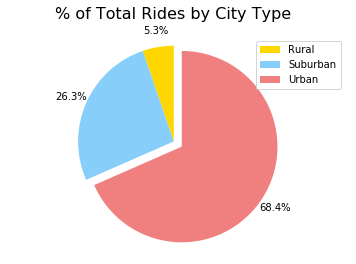

In [14]:
# get total rides per city type
total_rides = by_type.count()["ride_id"]

# create pie chart
plt.pie(total_rides,explode=explode,labels=None,colors=colors,autopct="%.1f%%",
        shadow=False,startangle=90,rotatelabels=False,pctdistance=1.17)
plt.suptitle("% of Total Rides by City Type",fontsize=16)
plt.legend(labels,loc="upper right")
plt.axis("equal")


# save image
plt.savefig("total_rides_by_city_type.jpg")

plt.show()

## Total Drivers by City Type

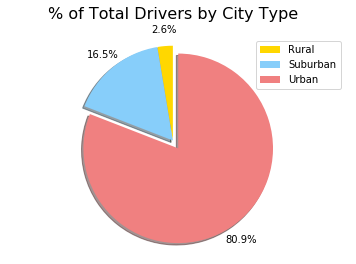

In [15]:
# get total drivers per city type
total_drivers = city_data.groupby("type")["driver_count"].sum()
total_drivers

# create pie chart
plt.pie(total_drivers,explode=explode,labels=None,colors=colors,autopct="%.1f%%",
        shadow=True,startangle=90,rotatelabels=False,pctdistance=1.17)
plt.suptitle("% of Total Drivers by City Type",fontsize=16)
plt.legend(labels,loc="upper right")
plt.axis("equal")

# save image
plt.savefig("total_drivers_by_city_type.jpg")

plt.show()

## Trends based on the data:

* Urban and Suburban cities with a small number of drivers have the highest average fares, as well as a low amount of rides (as seen on top left corner of bubble chart).
* Though less than 3% of drivers are from rural cities, these drivers make almost 7% of the total fares, while around 90% of drivers (from urban cities) share only 62% of the fares.
* There are a handful of Urban cities with a low average fare, as well as a low number of drivers. This is worthy an investigation as one of my hypothesis is that we have a strong competition in those places, hence we could do some marketing to attract users/drivers and grow our business. In other words, if it's cheap for users, and it's not due to our large supply of drivers, it could be because someone else is making those rides, and we're loosing market share.